<a href="https://colab.research.google.com/github/csubhodeep/lyrics_overlay/blob/develop/notebooks/text_font/text_font_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text experiments for lyrics overlay


In [38]:
from PIL import ImageFont, ImageDraw
from PIL import Image 
import PIL 
import os

In [ ]:
#good fonts
# china.otf
# yatra_one.ttf
# crayons.ttf

In [177]:
home = "../misc_data/"
font_path = os.path.join(home, 'fonts','debby.ttf')
test_image_path = os.path.join(home,'background.jpeg')

In [178]:
in_img = Image.open(test_image_path) 
print(in_img.size)
draw = ImageDraw.Draw(in_img)

(1000, 667)


In [179]:
draw.rectangle(((132.5, 140), (132.5+22.5, 140+45)), fill="black")

In [180]:
font = ImageFont.truetype(font_path, 45)

draw.text((132.5, 140), "Lyrics", font=font)
draw.text((132.5, 200), "yahi", font=font)
draw.text((132.5, 260), "lagaenge", font=font)

In [181]:
in_img.size
in_img.save(os.path.join(home,'out.jpeg'))

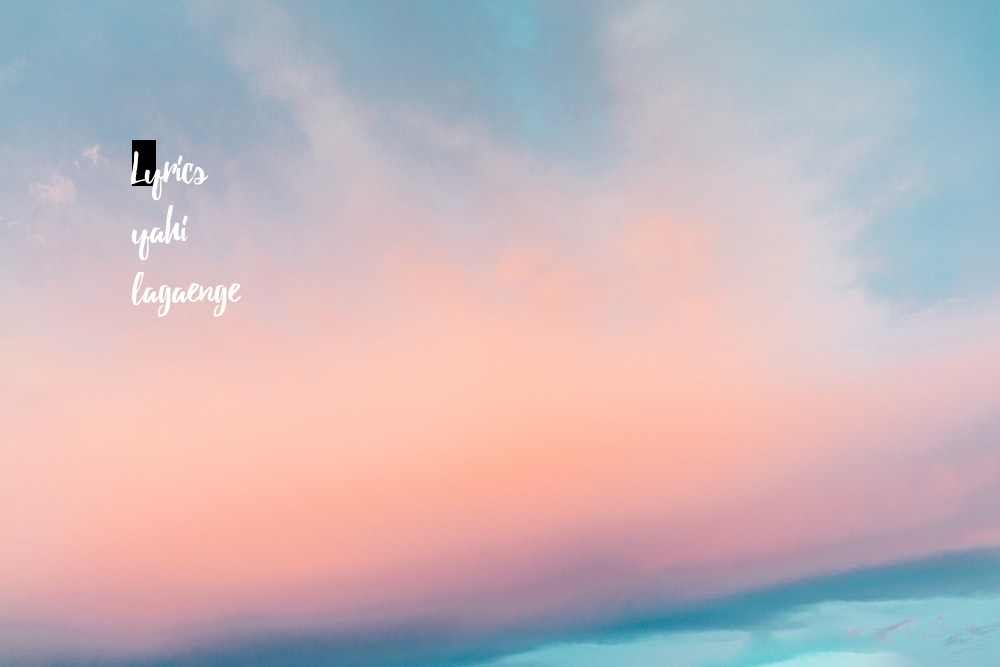

In [182]:
in_img

In [183]:
def draw_alphabets(draw, font_size, gap, font_name, box_scale=1, font_start_gap_scale=0):
  font = ImageFont.truetype(font_name, font_size)
  box_x = 0 
  box_y = 0
  h = font_size
  w = font_size/2
  scaled_h = box_scale*h
  scaled_w = box_scale*w
  for i in range(ord('A'), ord('Z') + 1):
    draw.rectangle(((box_x, box_y), (box_x+scaled_w, box_y+scaled_h)), fill="black")
    text_x = box_x + w*font_start_gap_scale
    text_y = box_y + h*font_start_gap_scale
    draw.text((text_x, text_y), chr(i), font=font)
    box_x = box_x + scaled_w + gap
  box_x = 0 
  box_y = scaled_h+5
  for i in range(ord('a'), ord('z') + 1):
    draw.rectangle(((box_x, box_y), (box_x+scaled_w, box_y+scaled_h)), fill="black")
    text_x = box_x + w*font_start_gap_scale
    text_y = box_y + h*font_start_gap_scale
    draw.text((text_x, text_y), chr(i), font=font)
    box_x = box_x + scaled_w + gap
  return draw

In [184]:
def draw_word(x,y,draw, word, font_size, gap, font_name, box_scale=1, font_start_gap_scale=0):
  font = ImageFont.truetype(font_name, font_size)
  box_x = x 
  box_y = y
  h = font_size
  w = font_size/2
  scaled_h = box_scale*h
  scaled_w = box_scale*w*len(word)
  draw.rectangle(((box_x, box_y), (box_x+scaled_w, box_y+scaled_h)), fill="black")
  text_x = box_x + w*font_start_gap_scale
  text_y = box_y + w*font_start_gap_scale
  draw.text((text_x, text_y), word, font=font)

  return draw


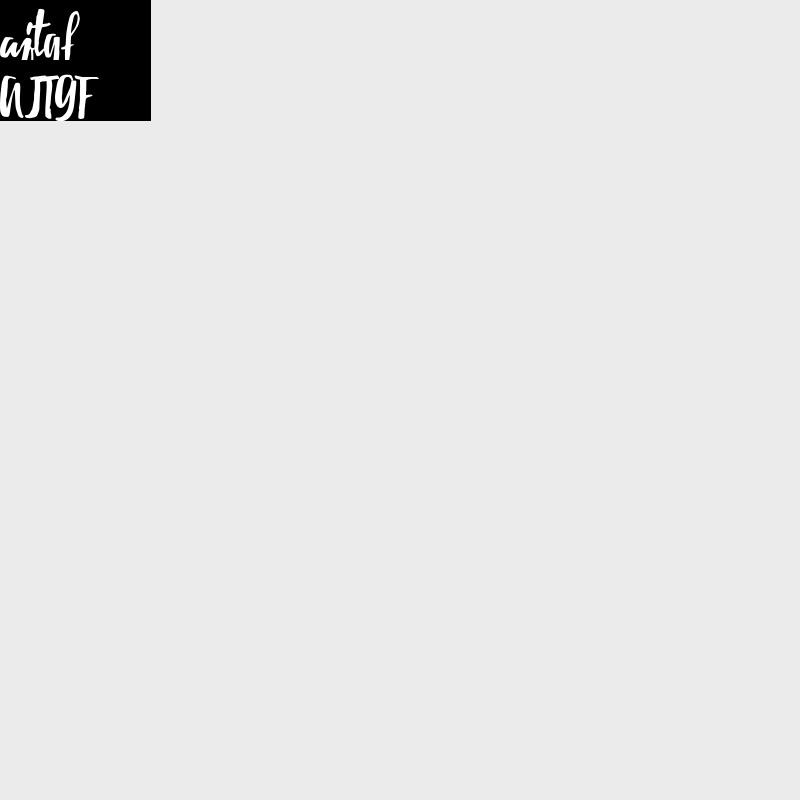

In [185]:
in_img = Image.new("RGB", (800, 800), (235, 235, 235))
draw = ImageDraw.Draw(in_img)
draw_word(0,0, draw,"ajtgf",60,4, font_path, box_scale=1,font_start_gap_scale=0.0)
draw_word(0,60, draw,"AJTGF",60,4, font_path, box_scale=1,font_start_gap_scale=0.0)
in_img

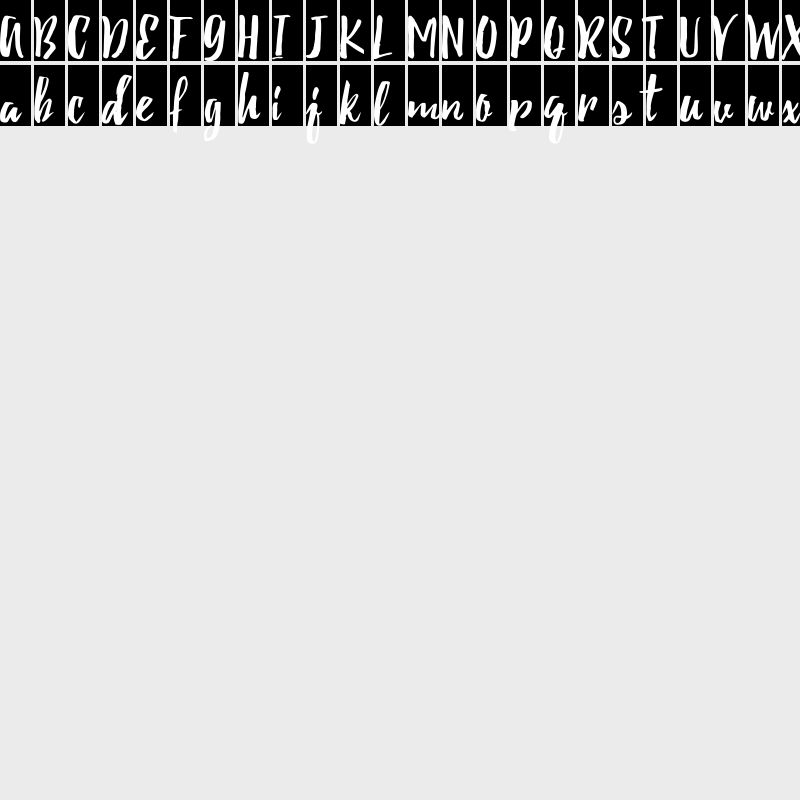

In [186]:
in_img = Image.new("RGB", (800, 800), (235, 235, 235))
draw = ImageDraw.Draw(in_img)
draw_alphabets(draw,60,4, font_path, box_scale=1,font_start_gap_scale=0.0)
in_img

In [187]:
import math
math.ceil(7/2)
text = "1 22 333 4444"
i=3
length = len("".join(text.split(" ")[i:i+2]))
print(length)

4


In [188]:
def get_y_and_heights(text_wrapped, dimensions, margin, font):
    """Get the first vertical coordinate at which to draw text and the height of each line of text"""
    # https://stackoverflow.com/a/46220683/9263761
    ascent, descent = font.getmetrics()

    # Calculate the height needed to draw each line of text (including its bottom margin)
    line_heights = [
        font.getmask(text_line).getbbox()[3] + descent + margin
        for text_line in text_wrapped
    ]
    # The last line doesn't have a bottom margin
    line_heights[-1] -= margin

    # Total height needed
    height_text = sum(line_heights)

    # Calculate the Y coordinate at which to draw the first line of text
    y = (dimensions[1] - height_text) // 2

    # Return the first Y coordinate and a list with the height of each line
    return (y, line_heights)

In [189]:
def draw_text(draw_interface, text,origin_x,origin_y,WIDTH,HEIGHT,):
  # Wrap the `text` string into a list of `CHAR_LIMIT`-character strings
  text_lines = wrap(text, CHAR_LIMIT)
  # Get the first vertical coordinate at which to draw text and the height of each line of text
  y, line_heights = get_y_and_heights(
      text_lines,
      (WIDTH, HEIGHT),
      1,
      font
  )

  # Draw each line of text
  for i, line in enumerate(text_lines):
      # Calculate the horizontally-centered position at which to draw this line
      line_width = font.getmask(line).getbbox()[2]
      x = ((WIDTH - line_width) // 2)

      # Draw this line
      draw_interface.text((x, y), line, font=font, fill=TEXT_COLOR)

      # Move on to the height at which the next line should be drawn at
      y += line_heights[i]

In [276]:
#############################################################################
##### Function to draw text in box
##### Input:
##### pil image
##### box (absolute value x,y,w,h)
##### text
##### font_name
############################################################################
import math
from PIL import ImageFont, ImageDraw
from PIL import Image 
import PIL 

def find_font_size_and_pattern(x,y,w,h, text):
    pattern = int(w/h) +1
    if pattern < 2:
        pattern = 2
    elif pattern > 5:
        pattern = 5
    max_width = 0 
    num_lines = math.ceil(len(text.split(" "))/pattern)
    for i in range(0,len(text),pattern):
        length = len(" ".join(text.split(" ")[i:i+pattern]))
        if length > max_width:
            max_width = length
    max_width += 2
    font_size_init = int(h/(num_lines+1))
    for size in range(font_size_init, int(font_size_init/4), -1):
        if (size/2)*max_width < w:
            return size, pattern

    return False, False

def draw_text_inside_box(image:PIL.Image, x,y,w,h, text, pattern, font_size, font_name):
    image_rgba = image.convert("RGBA")
    text_canvas = Image.new('RGBA', image.size, (255,255,255,0))
    draw = ImageDraw.Draw(text_canvas)
    font = ImageFont.truetype(font_name, font_size)
    #draw.rectangle(((x, y), (x+w, y+h)), fill="black") #only debug purpose
    text_x = int(x + font_size/2)
    text_y = int(y + font_size/4)
    shadow_width =3
    shadowcolor = (128,128,128,50)
    shadow_font = ImageFont.truetype(font_name, font_size+int(shadow_width/2))
    for i in range(0,len(text),pattern):
        text_line = " ".join(text.split(" ")[i:i+pattern])

        # thin border
        

        draw.text((text_x-shadow_width, text_y), text_line, font=shadow_font, fill=shadowcolor)
        draw.text((text_x+shadow_width, text_y), text_line, font=shadow_font, fill=shadowcolor)
        draw.text((text_x, text_y-shadow_width), text_line, font=shadow_font, fill=shadowcolor)
        draw.text((text_x, text_y+shadow_width), text_line, font=shadow_font, fill=shadowcolor)
        # main text
        draw.text((text_x, text_y), text_line, font=font)
        
        text_y = text_y + font_size
    combined = Image.alpha_composite(image_rgba, text_canvas) 
    return combined

def draw_text_in_box(image, x,y,w,h, text, font_name):
    #############
    # line 114 in optimizer/optimize.py
    font_size, pattern = find_font_size_and_pattern(x,y,w,h,text)
    ###############
    if font_size:
        #####################
        # line 150 of post_processor/overlay.py
        return draw_text_inside_box(image,x,y,w,h,text,pattern,font_size,font_name)
        #####################################
    else:
        # find fontsize again with other pattern
        print("Font size could not be found")
        return False

In [277]:
import random

def test_function(num_cases):
    for i in range(num_cases):
        in_img = Image.open(test_image_path) 
        ###############################
        # Meaningfull random init of box
        ################################
        x=0.05*in_img.size[0]
        y=0.4*in_img.size[1]
        w=random.randint(200,450)
        h=random.randint(60,200)
        ###############################
        text = "SAPNO MAI ROJ AAYE, AA ZINDAGI MAI AANA SANAM"
        text = "O No Jaane Jaana"
        #font_list = ["Debby.ttf", "Playlist.otf", "chalk_font1.ttf", "chalk_font2.otf"]
        font_list = ['china.otf', 'crayons.ttf', 'yatra_one.ttf']
        font_name = os.path.join(home, 'fonts',random.choice(font_list))
        #font_name = "fonts/chalk_font3.ttf"
        out= draw_text_in_box(in_img, x,y,w,h, text, font_name)
        out.save("../test_output/" + str(i) + ".png")

In [278]:
test_function(10)

In [261]:
################################################
# random code from someone to draw centered text
###################################################
from PIL import Image, ImageDraw, ImageFont
from textwrap import wrap




FONT_FAMILY = "fonts/Debby.ttf"
WIDTH = 400
HEIGHT = 400
FONT_SIZE = 60
V_MARGIN =  10
CHAR_LIMIT = 20
BG_COLOR = "black"
TEXT_COLOR = "white"

text = "Sapne mai roj aaye aa zindagi mai aana sanam"

# Create the font
font = ImageFont.truetype(FONT_FAMILY, FONT_SIZE)
# New image based on the settings defined above
img = Image.new("RGB", (WIDTH, HEIGHT), color=BG_COLOR)
# Interface to draw on the image
draw_interface = ImageDraw.Draw(img)



# Save the resulting image
img.save("result.png")

OSError: cannot open resource

In [406]:
 i love
 you nikhilas
 dil char
 hai no

 word 8
 pattern 2
 8/2 = 4

 8/2 * 12 = 48 
 50